In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from scipy.optimize import curve_fit
from matplotlib.gridspec import GridSpec

In [1379]:
NumberOfFiles=1450 #Number of files to be used
IntegrationWindow=[200,750] #TimeTick Window in which we will integrate
FullWindow=1200 #Full length of the Waveform window (in TimeTicks)
WindowFraction=(IntegrationWindow[1]-IntegrationWindow[0])/FullWindow #Fraction of the full window in which we will integrate
HamDCR=0.913*WindowFraction
CaenDCR=0.09*WindowFraction

File400nm_Ham='23_11_23/400nm/4001_'
File500nm_Ham='23_11_23/500nm_test4/500_test41_'
File600nm_Ham='23_11_23/600nm/6001_'


File400nm_Caen='23_11_23/400nm/4002_'
File500nm_Caen='23_11_23/500nm_test4/500_test42_'
File600nm_Caen='23_11_23/600nm/6002_'

In [1368]:
WfHam=[]
for num in range(NumberOfFiles):
    with open(File400nm_Ham+str(num)+'.txt', 'r') as file:
        # Lee todas las líneas del archivo
        lines = file.readlines()
        # Itera sobre cada línea y convierte el contenido a números
        WfHam.append([float(line.strip()) for line in lines[IntegrationWindow[0]:IntegrationWindow[1]]])

In [1369]:
#Waveform Plotting
NumPlots=0

x=np.linspace(0,len(WfHam[0]),len(WfHam[0]))
for num in range(NumPlots):
    fig, ax =plt.subplots(1, figsize=(11,8))
    ax.grid()
    x=np.linspace(0,len(WfHam[num]),len(WfHam[num]))
    ax.plot(x,WfHam[num])
    ax.plot(x,len(WfHam[num])*[np.mean(WfHam[num])])
    print(num, 'Baseline is ' , np.mean(WfHam[num]) , ' Integral is ', sum(WfHam[num]), ' With a max of ', max(WfHam[num]))
    
    

In [1370]:
MaxVoltHam=[] #Max Amplitude of the Wf within the integration window
TimeMaxHam=[] #TimeTick at which we reach the max amplitude
SumHam=[] #Integrated Voltaje over the integration window
for num in range(len(WfHam)):
    MaxVoltHam.append(max(WfHam[num]))
    TimeMaxHam.append(WfHam[num].index(max(WfHam[num])))
    SumHam.append(sum(WfHam[num]))

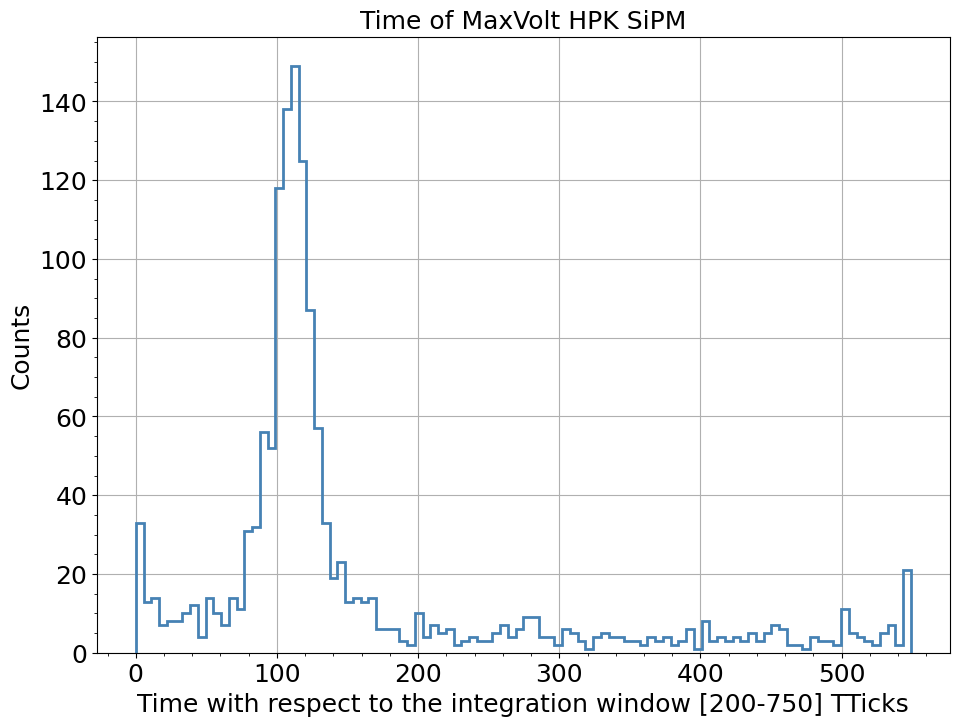

In [1371]:
fig,ax=plt.subplots(1,figsize=(11,8))
ax.hist(TimeMaxHam, histtype='step', color='steelblue', lw=2, bins=100)
ax.set_xlabel('Time with respect to the integration window ['+str(IntegrationWindow[0])+'-'+str(IntegrationWindow[1])+'] TTicks', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.set_title('Time of MaxVolt HPK SiPM', fontsize=18)
ax.grid()
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=18)


1.3337049482758645


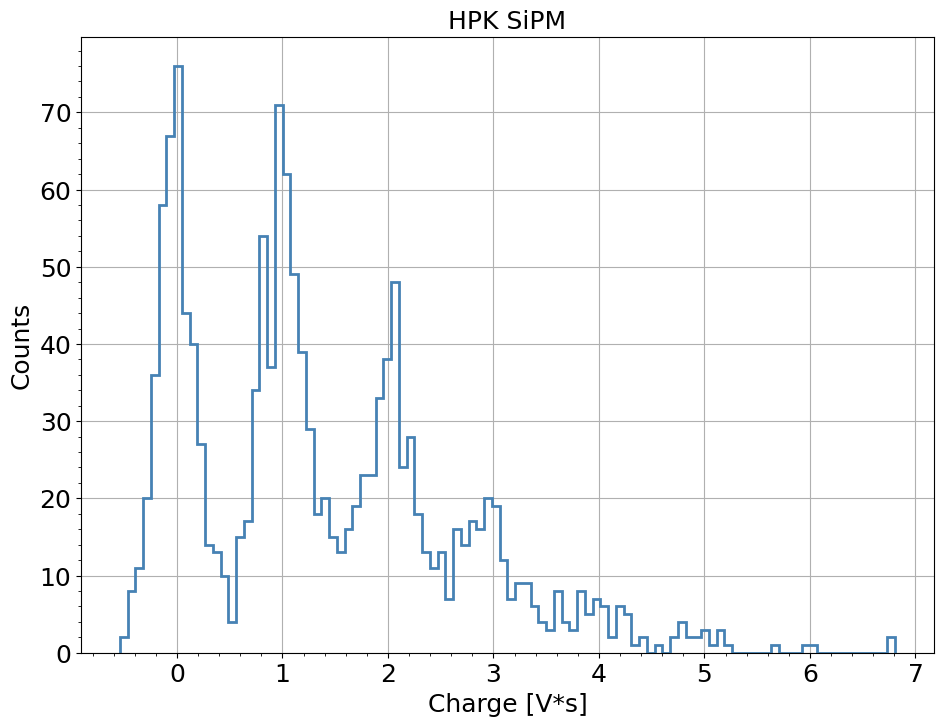

In [1372]:
fig,ax=plt.subplots(1,figsize=(11,8))

SumHamNorm=[(i-0.95)/0.4 for i in SumHam]
ax.hist(SumHamNorm, histtype='step', color='steelblue', lw=2, bins=100)
ax.set_xlabel('Charge [V*s]', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.set_title('HPK SiPM', fontsize=18)
ax.grid()
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=18)
print(np.mean(SumHamNorm))
#ax.set_xlim(0,0.2)

In [1373]:
WfCaen=[]
for num in range(NumberOfFiles):
    with open(File400nm_Caen+str(num)+'.txt', 'r') as file:
        # Lee todas las líneas del archivo
        lines = file.readlines()
        # Itera sobre cada línea y convierte el contenido a números
        WfCaen.append([float(line.strip()) for line in lines[IntegrationWindow[0]:IntegrationWindow[1]]])


In [1374]:
x=np.linspace(0,len(WfCaen[0]),len(WfCaen[0]))
for num in range(NumPlots):
    fig, ax =plt.subplots(1, figsize=(11,8))
    ax.grid()
    x=np.linspace(0,len(WfCaen[num]),len(WfCaen[num]))
    ax.plot(x,WfCaen[num],color='indianred')
    ax.plot(x,len(WfCaen[num])*[np.mean(WfCaen[num])], color='indianred')
    print(num, 'Baseline is ' , np.mean(WfCaen[num]) , ' Integral is ', sum(WfCaen[num]), ' With a max of ', max(WfCaen[num]))

In [1375]:
MaxVoltCaen=[]
TimeMaxCaen=[]
SumCaen=[]
for num in range(len(WfCaen)):
    MaxVoltCaen.append(max(WfCaen[num]))
    TimeMaxCaen.append(WfCaen[num].index(max(WfCaen[num])))
    SumCaen.append(sum(WfCaen[num]))

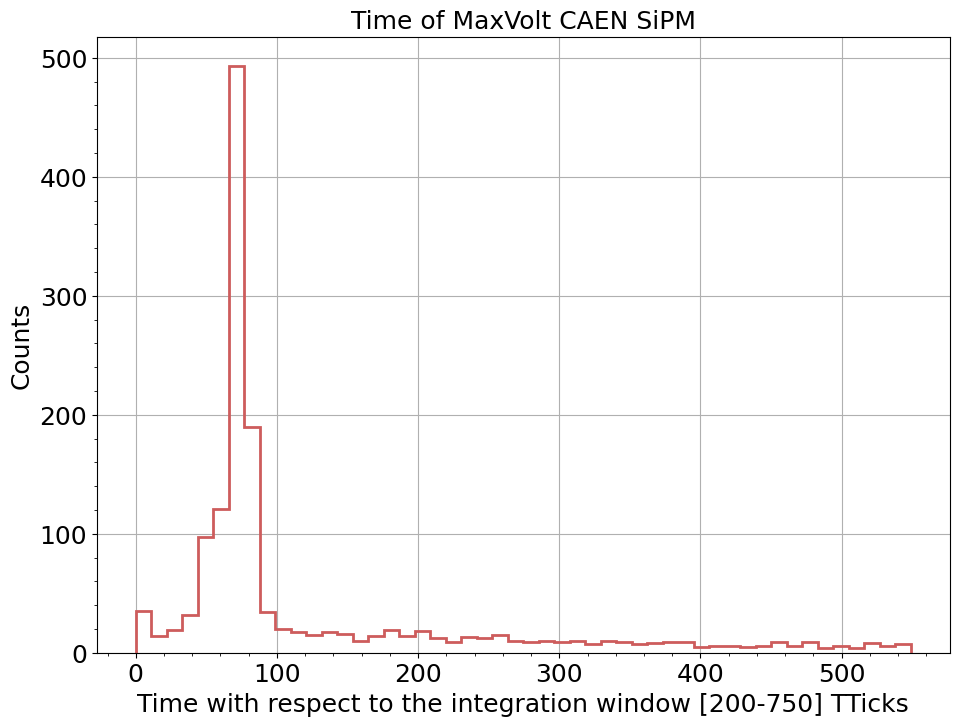

In [1376]:
fig,ax=plt.subplots(1,figsize=(11,8))
ax.hist(TimeMaxCaen, histtype='step', color='indianred', lw=2, bins=50)
ax.set_xlabel('Time with respect to the integration window ['+str(IntegrationWindow[0])+'-'+str(IntegrationWindow[1])+'] TTicks', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.set_title('Time of MaxVolt CAEN SiPM', fontsize=18)
ax.grid()
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=18)

1.0756749927826779


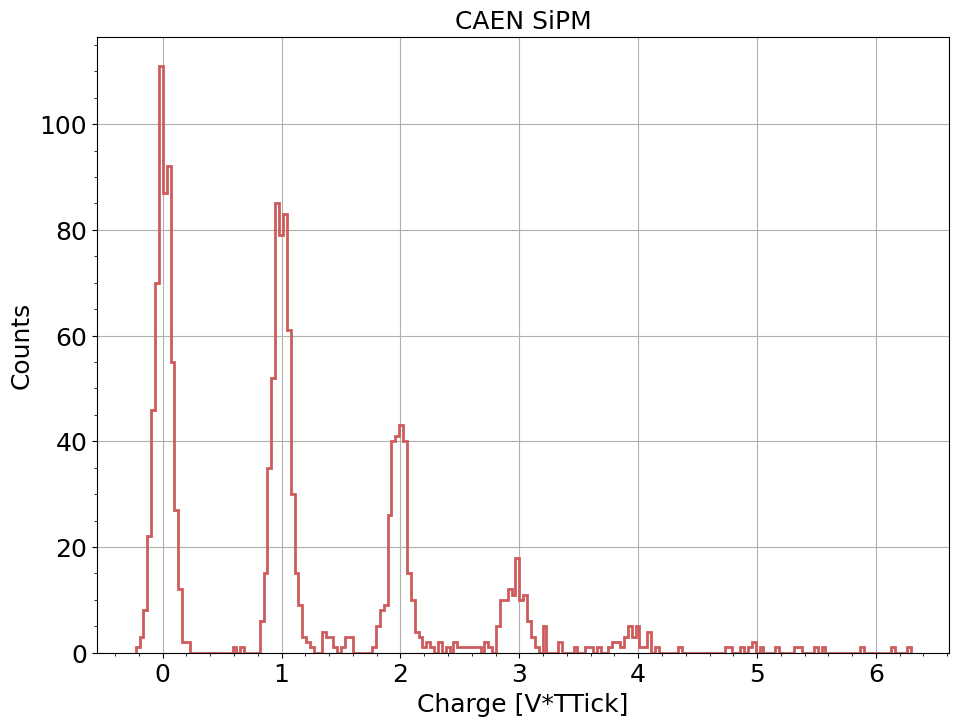

In [1377]:
fig,ax=plt.subplots(1,figsize=(11,8))

SumCaenNorm=[(i+1.4)/2.15 for i in SumCaen]
ax.hist(SumCaenNorm, histtype='step', color='indianred', lw=2, bins=200)
ax.set_xlabel('Charge [V*TTick]', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.set_title('CAEN SiPM', fontsize=18)
ax.grid()
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=18)
print(np.mean(SumCaenNorm))

In [1378]:
MeanNumberOfPhotonsHam = np.mean(SumHamNorm)-HamDCR
MeanNumberOfPhotonsCaen = np.mean(SumCaenNorm)-CaenDCR

print('The ratio is ', MeanNumberOfPhotonsHam/MeanNumberOfPhotonsCaen)

The ratio is  0.884787801269623
